* Data Collection Reference: https://github.com/corazzon/cracking-the-pandas-cheat-sheet/blob/master/seoul-covid-19-01-read_html.ipynb
* Data analysis reference: https://github.com/corazzon/cracking-the-pandas-cheat-sheet/blob/master/seoul-covid-19-02-eda.ipynb

In [1]:
from datetime import date

today = date.today()
print("Today's date:", today)

Today's date: 2020-09-05


In [2]:
import pandas as pd
import numpy as np

In [3]:
# target url for the covid19 data: Seoul City
url = "http://www.seoul.go.kr/coronaV/coronaStatus.do"
url

'http://www.seoul.go.kr/coronaV/coronaStatus.do'

In [4]:
# read all table datas in the web html template
tables = pd.read_html(url)
tables

[   종로구   중구  용산구  성동구  광진구  동대문구  중랑구  성북구  강북구  도봉구  노원구  은평구 서대문구
 0   67   54  107  101  105   130  161  294  124  145  255  199  100
 1  마포구  양천구  강서구  구로구  금천구  영등포구  동작구  관악구  서초구  강남구  송파구  강동구   기타
 2  140  154  228  153   74   148  182  277  156  205  265  157  270,
     종로구   중구  용산구  성동구  광진구 동대문구
 0    67   54  107  101  105  130
 1   중랑구  성북구  강북구  도봉구  노원구  은평구
 2   161  294  124  145  255  199
 3  서대문구  마포구  양천구  강서구  구로구  금천구
 4   100  140  154  228  153   74
 5  영등포구  동작구  관악구  서초구  강남구  송파구
 6   148  182  277  156  205  265
 7   강동구   기타  NaN  NaN  NaN  NaN
 8   157  270  NaN  NaN  NaN  NaN,
      소계  해외접촉관련  도봉구 운동 시설  8·15 서울도심 집회  노원구 빛가온 교회  노원구 기도 모임  동작구 카드발급 업체  \
 0  4251     393         10           118          39          8           26   
 
    성북구 사랑제일 교회  송파구 소재 병원  강동구 소재 병원  ...  중구소재 은행 관련  성북구 요양 시설  중랑구 체육 시설  \
 0          638          7          6  ...           6          9         11   
 
    구로구 보성 운수  성북구 체대 입시  동작구 서울 신학교  용인시 우리제일 교회  타 시·도

In [5]:
# index the table with covid19 patient data
tables[-2]

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,4251,미부여,9.04.,타시,-,송파구 소재 병원,NaN
1,4250,20979,9.04.,노원구,-,노원구 빛가온교회 관련,NaN
2,4249,20974,9.04.,성동구,-,강동구 소재 병원,NaN
3,4248,20962,9.04.,성북구,-,성북구 사랑제일교회 관련,NaN
4,4247,미부여,9.03.,성북구,-,8.15도심집회,NaN
...,...,...,...,...,...,...,...
4246,5,9,1.31.,성북구,-,#5 접촉,퇴원
4247,4,7,1.30.,마포구,중국 우한시,해외 접촉,퇴원
4248,3,6,1.30.,종로구,-,#3 접촉,퇴원
4249,2,5,1.30.,중랑구,중국 우한시,해외 접촉,퇴원


In [6]:
# get number of confirmed cases and numbers of columns
df = tables[-2]
df.shape

(4251, 7)

In [7]:
# peek at the dataframe
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,4251,미부여,9.04.,타시,-,송파구 소재 병원,NaN
1,4250,20979,9.04.,노원구,-,노원구 빛가온교회 관련,NaN
2,4249,20974,9.04.,성동구,-,강동구 소재 병원,NaN
3,4248,20962,9.04.,성북구,-,성북구 사랑제일교회 관련,NaN
4,4247,미부여,9.03.,성북구,-,8.15도심집회,NaN


In [8]:
# most upto-date data
last_day = df.loc[0, "확진일"]
last_day = last_day.replace(".", "_")
last_day

'9_04_'

In [9]:
# naming file and setting the path
dataset_path = "./dataset/"
file_name = f"seoul_covid_{last_day}.csv"
file_path = dataset_path + file_name
file_path

'./dataset/seoul_covid_9_04_.csv'

In [10]:
df.to_csv(file_path, index=False)

In [11]:
# reed the covid dataset
df = pd.read_csv(file_path)

In [12]:
# sort according to the patient number
df = df.sort_values(["연번"], ascending=False)
df.head(15)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,4251,미부여,9.04.,타시,-,송파구 소재 병원,NaN
1,4250,20979,9.04.,노원구,-,노원구 빛가온교회 관련,NaN
2,4249,20974,9.04.,성동구,-,강동구 소재 병원,NaN
3,4248,20962,9.04.,성북구,-,성북구 사랑제일교회 관련,NaN
4,4247,미부여,9.03.,성북구,-,8.15도심집회,NaN
5,4246,미부여,9.03.,관악구,-,확인 중,NaN
6,4245,미부여,9.03.,마포구,-,확인 중,NaN
7,4244,미부여,8.30.,기타,-,확인 중,NaN
8,4243,미부여,9.02.,마포구,-,확인 중,NaN
9,4242,미부여,9.03.,성동구,-,확인 중,NaN


In [13]:
df_etc = df[df['접촉력'].str.match("기타")]
print(df_etc.shape)
df_etc.sample(15)

(485, 7)


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
1107,3144,18028,8.25.,중랑구,-,기타 확진자 접촉,NaN
1209,3042,17794,8.24.,중랑구,-,기타 확진자 접촉,NaN
1494,2757,17200,8.22.,중랑구,-,기타 확진자 접촉,NaN
31,4220,미부여,9.04.,기타,-,기타 확진자 접촉,NaN
73,4178,20780,9.03.,관악구,-,기타 확진자 접촉,NaN
244,4007,20302,9.01.,강남구,-,기타 확진자 접촉,NaN
49,4202,20941,9.04.,용산구,-,기타 확진자 접촉,NaN
164,4087,20612,9.02.,관악구,-,기타 확진자 접촉,NaN
242,4009,20435,9.01.,강서구,-,기타 확진자 접촉,NaN
574,3677,19528,8.29.,동작구,-,기타 확진자 접촉,NaN


In [14]:
# number of patients involved in church
df_church = df[df['접촉력'].str.contains("교회")]
church_infected_proportion = "{0:.0%}".format(round(len(dXf_church)/len(df), 3))
print(f"number of patients incurred from church: {church_infected_proportion}")
df_church.sample(5)

NameError: name 'dXf_church' is not defined

In [15]:
# number of patients involved in church other than 사랑제일교회
df_church_2 = df[(df["접촉력"].str.contains("교회") == True) & (df["접촉력"].str.contains("사랑제일교회") == False)]
church_infected_proportion2 = "{0:.0%}".format(round(len(df_church_2)/len(df), 3))
print(f"number of patients incurred from church: {church_infected_proportion2}")
df_church_2.head(5)

number of patients incurred from church: 8%


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
1,4250,20979,9.04.,노원구,-,노원구 빛가온교회 관련,NaN
12,4239,20960,9.04.,노원구,-,노원구 빛가온교회 관련,NaN
79,4172,20719,9.03.,노원구,-,노원구 빛가온교회 관련,NaN
112,4139,20686,9.02.,성동구,-,용인시 우리제일교회 관련,NaN
149,4102,20556,9.02.,노원구,-,노원구 빛가온교회 관련,NaN


In [16]:
# count the number of daily confirmed cases
df["확진일"].value_counts()

8.26.    153
8.18.    151
8.27.    146
8.15.    146
8.22.    140
        ... 
3.5.       1
4.19.      1
5.31.      1
2.7.       1
4.20.      1
Name: 확진일, Length: 197, dtype: int64

In [17]:
df["확진일"].head(4)

0    9.04.
1    9.04.
2    9.04.
3    9.04.
Name: 확진일, dtype: object

In [18]:
# transform date(string) into datetime object
df["확진일자"] = pd.to_datetime("2020"+"-"+df["확진일"].str.replace(".","-"))
df["확진일자"].head()

0   2020-09-04
1   2020-09-04
2   2020-09-04
3   2020-09-04
4   2020-09-03
Name: 확진일자, dtype: datetime64[ns]

In [19]:
# extract month, add column for the month
df["월"] = df["확진일자"].dt.month

In [20]:
# extract week, add column for the week
df["주"] = df["확진일자"].dt.week

In [21]:
# make a new column "월일" with datetime format
df["월일"] = df["확진일자"].astype(str).map(lambda x : x[-5:])
df.head(3)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
0,4251,미부여,9.04.,타시,-,송파구 소재 병원,NaN,2020-09-04,9,36,09-04
1,4250,20979,9.04.,노원구,-,노원구 빛가온교회 관련,NaN,2020-09-04,9,36,09-04
2,4249,20974,9.04.,성동구,-,강동구 소재 병원,NaN,2020-09-04,9,36,09-04


## Visualization

In [22]:
import matplotlib.pyplot as plt

# font designation
plt.rc("font", family="AppleGothic")
plt.rc("axes", unicode_minus=False)
plt.style.use("fivethirtyeight")

In [23]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

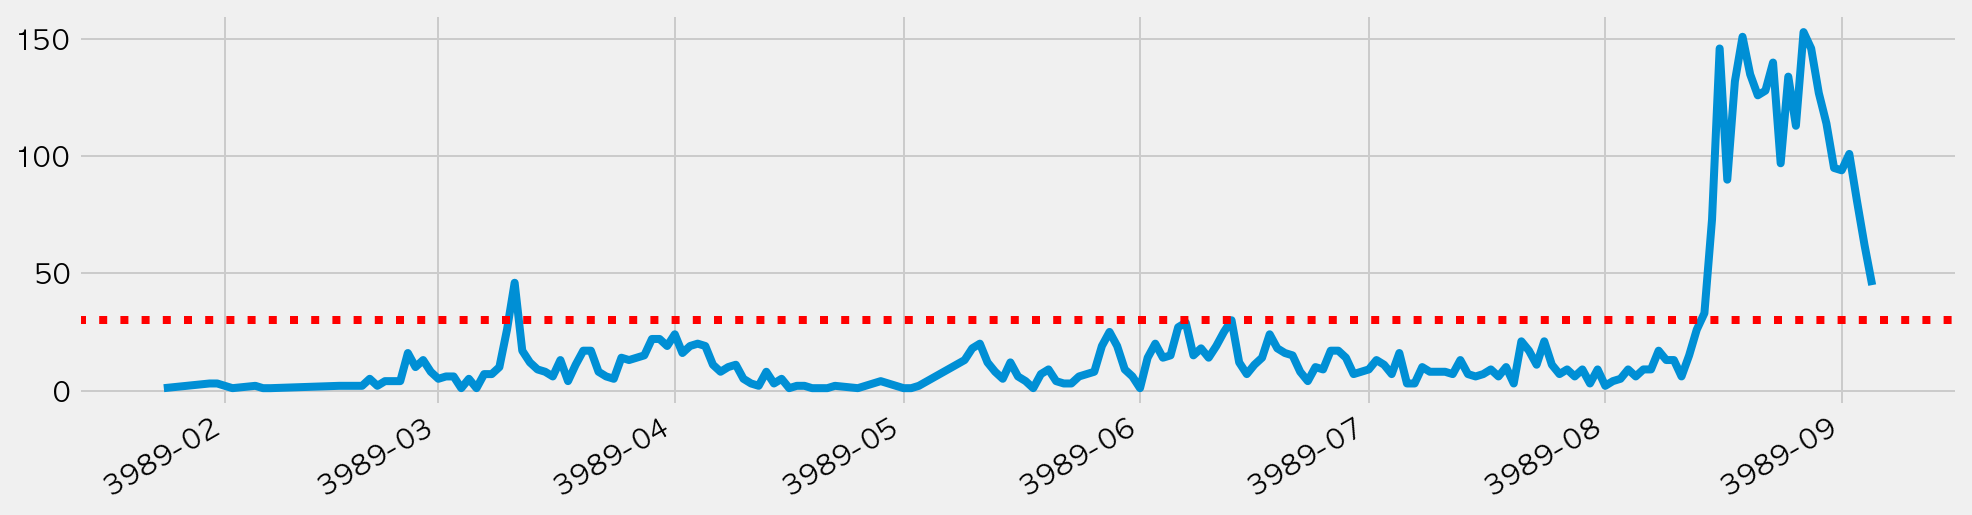

In [24]:
# plot total number of patients graph
df["확진일자"].value_counts().sort_index().plot(figsize=(15,4), rot=30, grid=True)
plt.axhline(30, linestyle=":", color="red")

In [25]:
df.head(15)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
0,4251,미부여,9.04.,타시,-,송파구 소재 병원,NaN,2020-09-04,9,36,09-04
1,4250,20979,9.04.,노원구,-,노원구 빛가온교회 관련,NaN,2020-09-04,9,36,09-04
2,4249,20974,9.04.,성동구,-,강동구 소재 병원,NaN,2020-09-04,9,36,09-04
3,4248,20962,9.04.,성북구,-,성북구 사랑제일교회 관련,NaN,2020-09-04,9,36,09-04
4,4247,미부여,9.03.,성북구,-,8.15도심집회,NaN,2020-09-03,9,36,09-03
5,4246,미부여,9.03.,관악구,-,확인 중,NaN,2020-09-03,9,36,09-03
6,4245,미부여,9.03.,마포구,-,확인 중,NaN,2020-09-03,9,36,09-03
7,4244,미부여,8.30.,기타,-,확인 중,NaN,2020-08-30,8,35,08-30
8,4243,미부여,9.02.,마포구,-,확인 중,NaN,2020-09-02,9,36,09-02
9,4242,미부여,9.03.,성동구,-,확인 중,NaN,2020-09-03,9,36,09-03


In [26]:
# take a peek at daily confirmed cases statistics
# 'count' is number of days elasped since covid19 outbreak. Rest of statistics are involved with confirmed cases.
day_count = df["월일"].value_counts().sort_index()
day_count.describe()

count    196.000000
mean      21.688776
std       34.719980
min        1.000000
25%        5.000000
50%        9.000000
75%       17.250000
max      153.000000
Name: 월일, dtype: float64

In [27]:
# get 10 days of recent confirmed cases
day_count[-10:]

08-26    153
08-27    146
08-28    127
08-29    114
08-30     95
08-31     94
09-01    101
09-02     81
09-03     62
09-04     45
Name: 월일, dtype: int64

In [28]:
# get maximum number of confirmed cases
day_count[day_count == day_count.max()]

08-26    153
Name: 월일, dtype: int64

In [29]:
# get dataframe corresponding to a selected date
df_day = df[df["월일"]=="08-24"]
df_day.head(10)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
1131,3120,17828,8.24.,노원구,-,확인 중,NaN,2020-08-24,8,35,08-24
1132,3119,17903,8.24.,성동구,-,8.15도심집회,NaN,2020-08-24,8,35,08-24
1133,3118,17913,8.24.,광진구,-,8.15도심집회,NaN,2020-08-24,8,35,08-24
1134,3117,17876,8.24.,광진구,-,확인 중,NaN,2020-08-24,8,35,08-24
1135,3116,17866,8.24.,광진구,-,확인 중,NaN,2020-08-24,8,35,08-24
1136,3115,17656,8.24.,기타,-,확인 중,NaN,2020-08-24,8,35,08-24
1137,3114,17618,8.24.,기타,-,확인 중,NaN,2020-08-24,8,35,08-24
1138,3113,17598,8.24.,기타,-,8.15도심집회(녹색병원),NaN,2020-08-24,8,35,08-24
1139,3112,17594,8.24.,기타,-,확인 중,NaN,2020-08-24,8,35,08-24
1140,3111,17553,8.24.,성북구,-,확인 중,NaN,2020-08-24,8,35,08-24


In [30]:
# Covid19 infection classified with patients' contact to the disease
number_of_paths = len(df["접촉력"].unique()) # get unique value for types of contagion route 
print(f"Total number of paths for infection: {number_of_paths}")
df["접촉력"].unique()

Total number of paths for infection: 231


array(['송파구 소재 병원', '노원구 빛가온교회 관련', '강동구 소재 병원', '성북구 사랑제일교회 관련',
       '8.15도심집회', '확인 중', '도봉구 운동시설', '타시도 확진자 접촉', '기타 확진자 접촉',
       '다래경매 관련', '노원구 기도모임', '동작구 카드 발급업체', '확인중', '광진구 소재병원',
       '성북구 체대입시', '성북구 요양시설', '중구 소재 은행', '중랑구 소재 체육시설', '관악구 판매업소',
       '동작구 소재 서울신학교', '용인시 우리제일교회 관련', '노원구 손해보험 관련', '구로구 보성운수',
       '강서구 서울대효요양병원', '서초구 장애인교육시설', '서대문구 지인모임', '강북구 일가족', '중구 하나은행본점',
       '강서구 보안회사', '롯데리아 종사자 모임', '해외 접촉 추정', '8.15도심집회(순복음 강북교회)',
       '영등포구 권능교회', '구로구 아파트 관련', '강남구 소재 아파트', '제주 게스트하우스 관련',
       '성북구 벧엘장로교회', '중앙보훈병원', '관악구 김혜근의원', '동대문구 sk탁구클럽', '동작구 스터디카페',
       '극단 산 관련', 'KT가좌지사 관련', '군인권센터', '동작구 요양시설 관련', '여의도 순복음교회 관련',
       '중구 보험회사(현대해상)', '강서구 병원관련', '종로구 혜화경찰서 관련', '양천구 되새김교회 관련',
       '현대커머셜', '8.15도심집회(녹색병원)', '영등포 IFC몰 오케스트로', '고양시 반석교회(케네디상가) 관련',
       '롯데 자산개발 관련', '골드트레인', '한양대병원', '은평구 헤어콕 관련', '순복음 강북교회',
       '서대문구 지인 모임', '강동구 어린이집', '광화문집회 관련', '성북구 체대입시 관련', '은평구 성경공부모임',
       '관악구 요양병원', '고대 안암병원 관련', '마포

In [31]:
# get two arrays of unknown route for contagion (미확인경로 확진자)
df.loc[df["접촉력"].str.contains("확인"),"접촉력"].unique()

array(['확인 중', '확인중'], dtype=object)

In [32]:
# overwrite whatever cell value that contains "확인" as "확인 중"
df.loc[df["접촉력"].str.contains("확인"),"접촉력"] = "확인 중"

# check whether those two arrays are combined
df.loc[df["접촉력"].str.contains("확인"),"접촉력"].unique()

array(['확인 중'], dtype=object)

In [33]:
df["접촉력"].value_counts().head(20)

확인 중             699
성북구 사랑제일교회 관련    638
기타 확진자 접촉        485
해외 접촉 추정         370
타시도 확진자 접촉       159
이태원 클럽 관련        139
리치웨이 관련          119
구로구 콜센터 관련        60
광화문집회 관련          56
양천구 운동시설 관련       43
요양시설 관련           43
구로구 교회 관련         41
용인시 우리제일교회 관련     41
노원구 빛가온교회 관련      39
수도권 개척교회 관련       37
콜센터직원 접촉          37
8.15도심집회          37
강남구 사무실 관련        36
극단 산 관련           36
구로구 아파트 관련        35
Name: 접촉력, dtype: int64

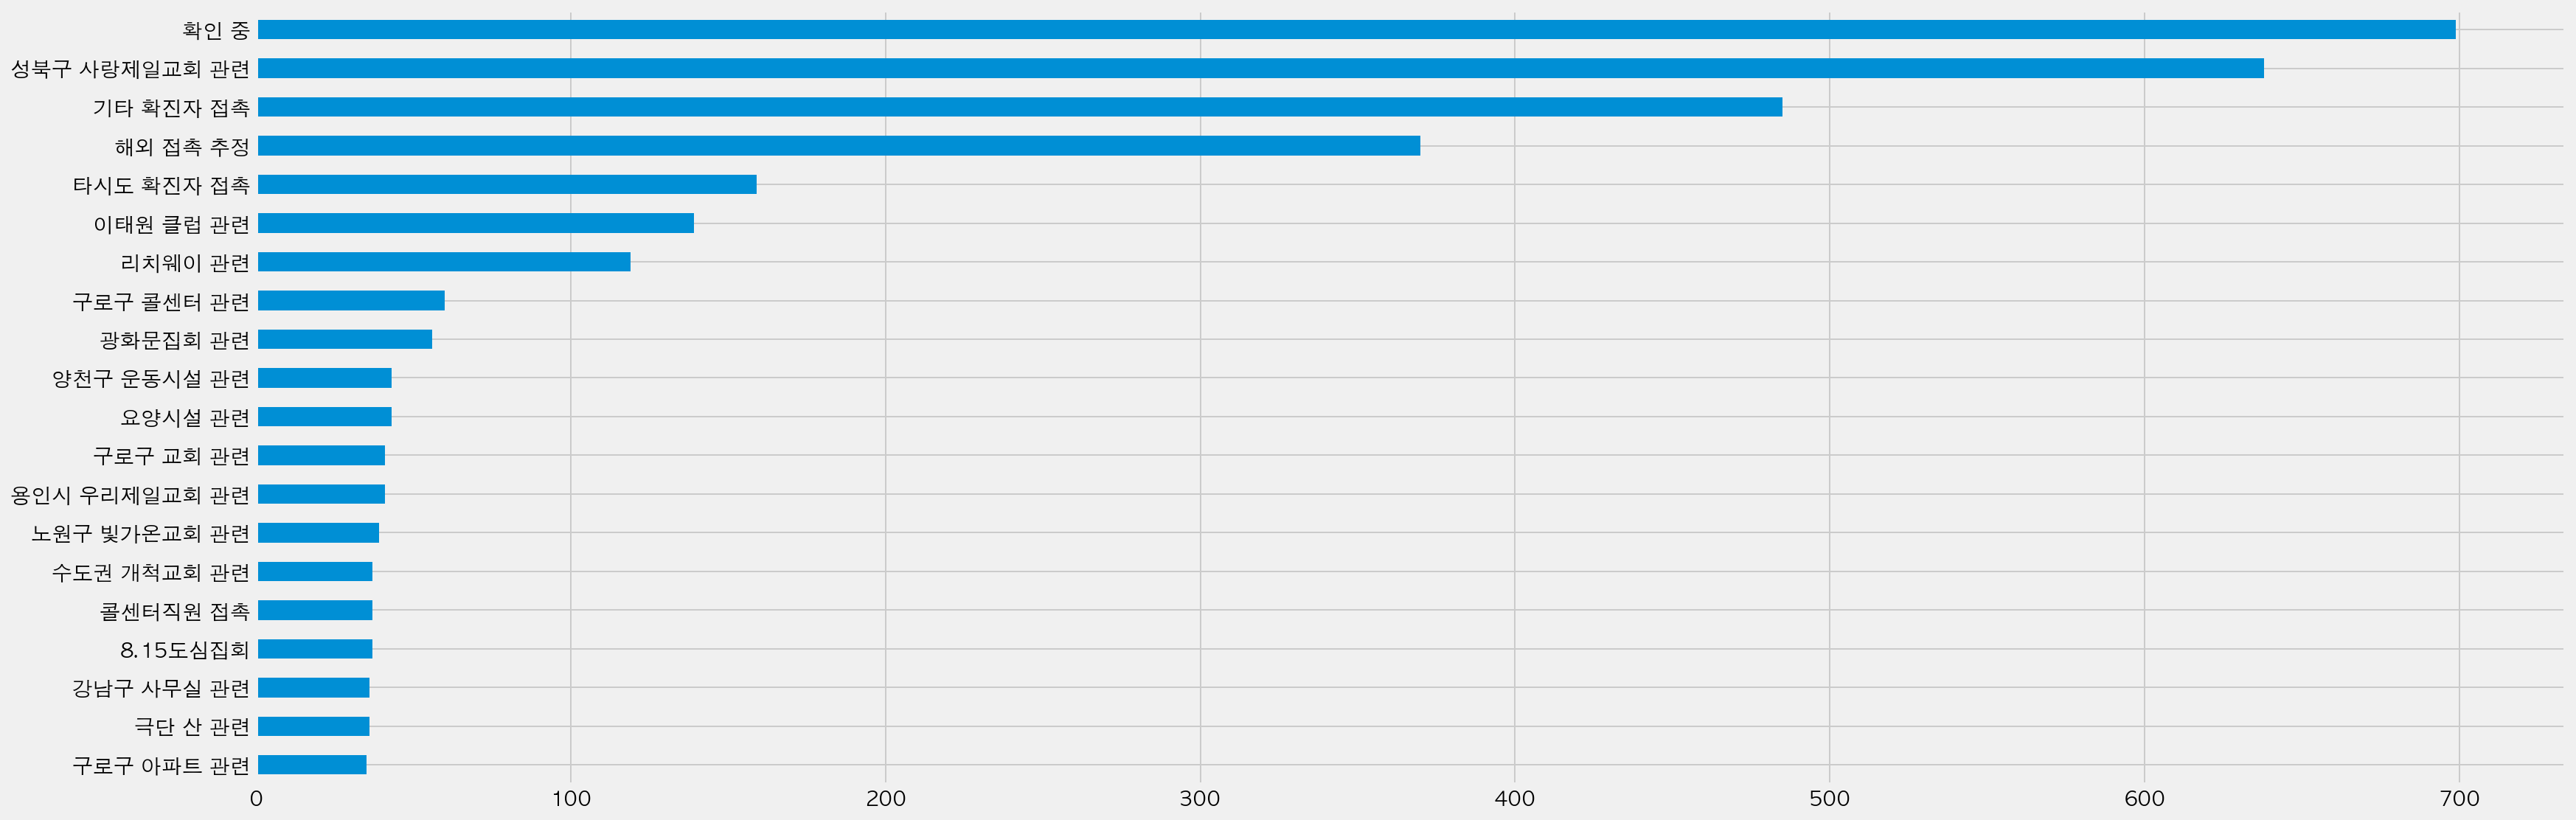

In [34]:
contact_count = df["접촉력"].value_counts()
contact_count_top = contact_count.sort_values().tail(20)
g = contact_count_top.plot.barh(figsize=(25,9))

In [35]:
figure_ranked = g.get_figure()
figure_ranked.savefig("./img/confirmed_path_rank.png")

In [36]:
top_contact = df["접촉력"].value_counts().head(15)
top_contact

확인 중             699
성북구 사랑제일교회 관련    638
기타 확진자 접촉        485
해외 접촉 추정         370
타시도 확진자 접촉       159
이태원 클럽 관련        139
리치웨이 관련          119
구로구 콜센터 관련        60
광화문집회 관련          56
양천구 운동시설 관련       43
요양시설 관련           43
구로구 교회 관련         41
용인시 우리제일교회 관련     41
노원구 빛가온교회 관련      39
수도권 개척교회 관련       37
Name: 접촉력, dtype: int64

## 감염경로 불명

In [37]:
df_untracked = df[df["접촉력"]=="확인 중"]
df_untracked

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
5,4246,미부여,9.03.,관악구,-,확인 중,NaN,2020-09-03,9,36,09-03
6,4245,미부여,9.03.,마포구,-,확인 중,NaN,2020-09-03,9,36,09-03
7,4244,미부여,8.30.,기타,-,확인 중,NaN,2020-08-30,8,35,08-30
8,4243,미부여,9.02.,마포구,-,확인 중,NaN,2020-09-02,9,36,09-02
9,4242,미부여,9.03.,성동구,-,확인 중,NaN,2020-09-03,9,36,09-03
...,...,...,...,...,...,...,...,...,...,...,...
4195,56,1768,2.25.,고양시,-,확인 중,퇴원,2020-02-25,2,9,02-25
4209,42,1370,2.25.,노원구,-,확인 중,퇴원,2020-02-25,2,9,02-25
4212,39,924,2.25.,평택,-,확인 중,퇴원,2020-02-25,2,9,02-25
4213,38,907,2.25.,관악구,-,확인 중,퇴원,2020-02-25,2,9,02-25


<AxesSubplot:xlabel='월,주'>

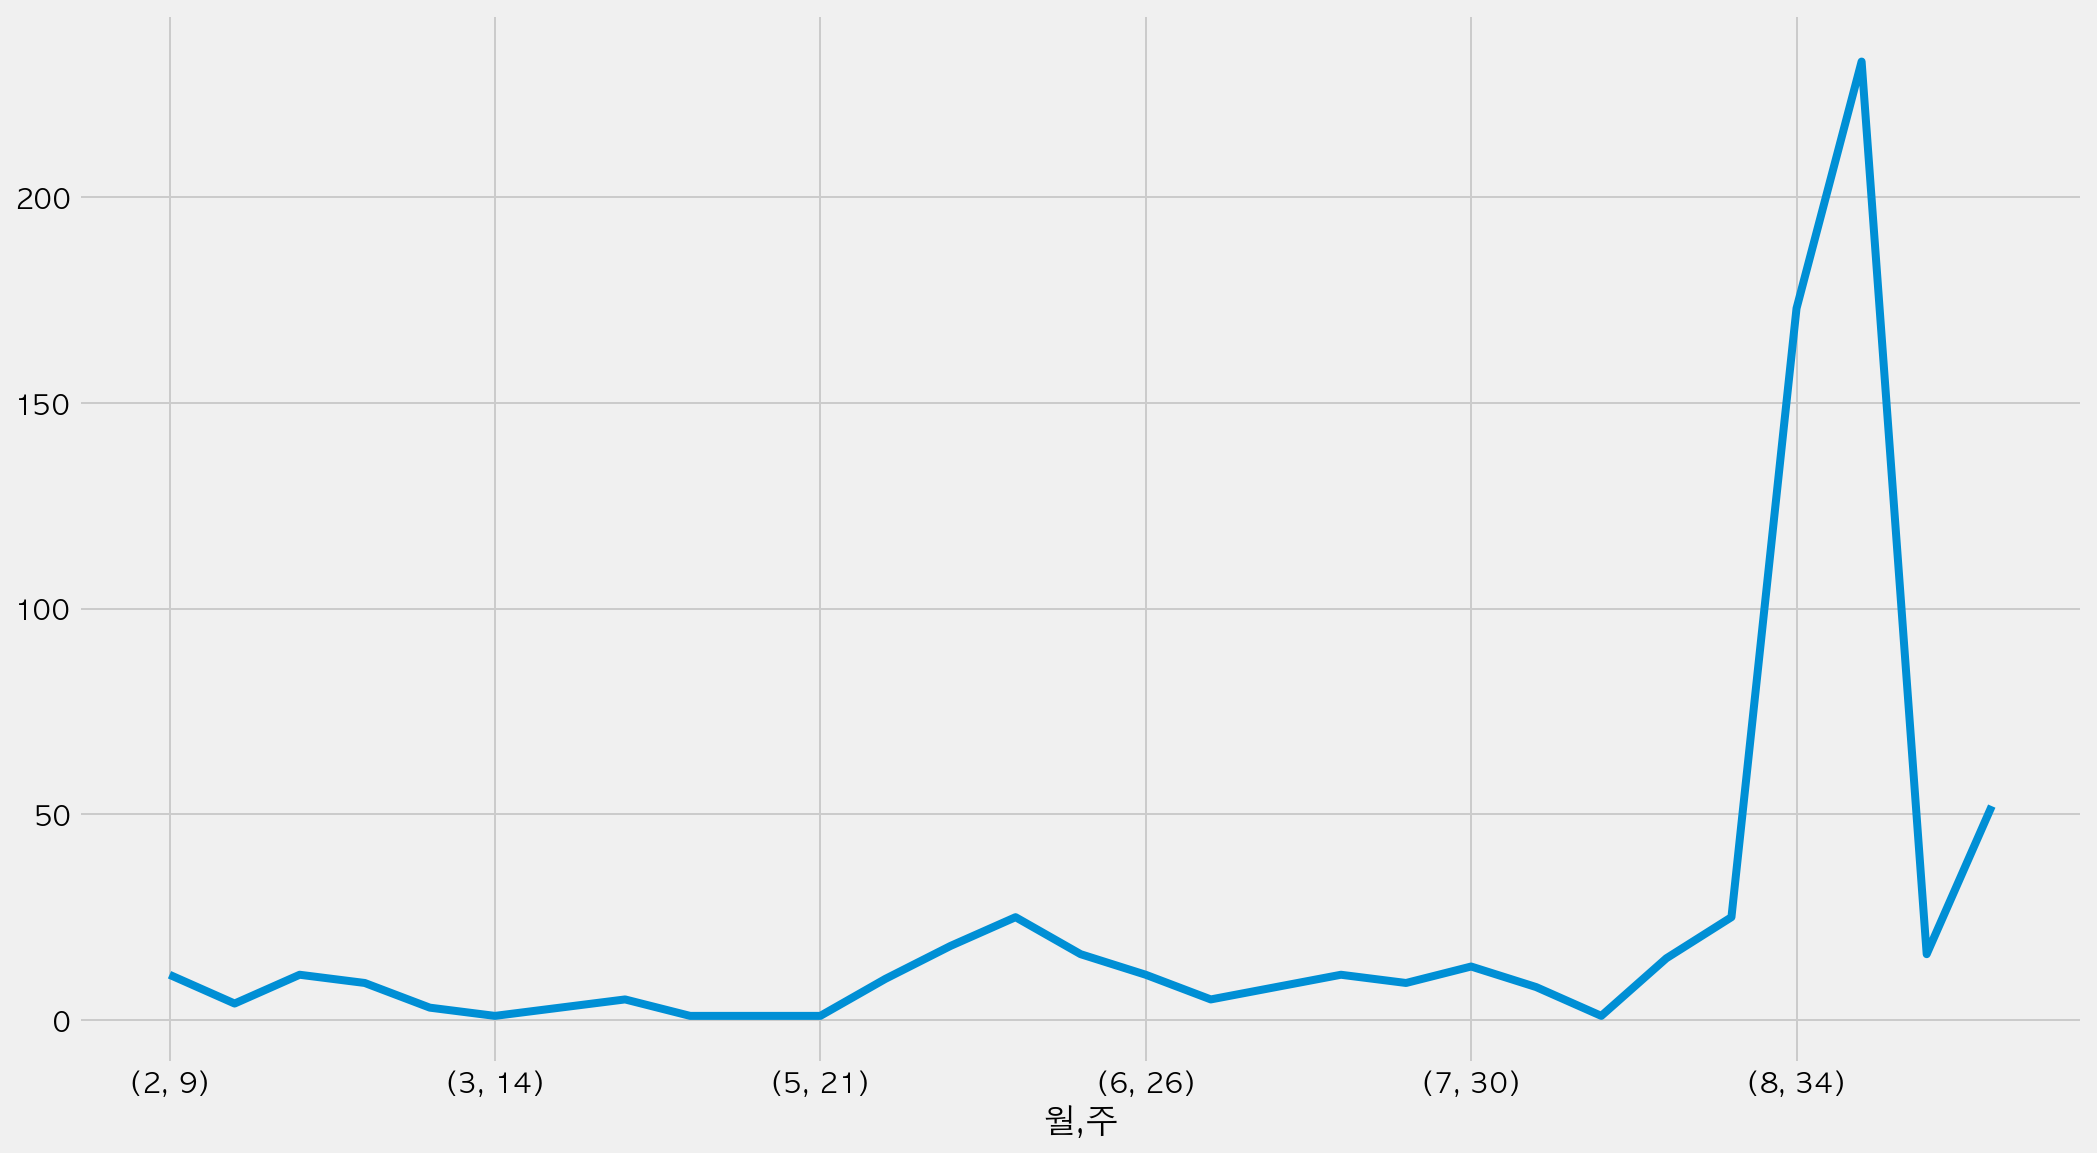

In [38]:
untracked_weekly_case = df_untracked.groupby(["월","주"])["연번"].count()
untracked_weekly_case.plot(figsize=(16,9))

In [39]:
all_weekly_case = df["주"].value_counts().to_frame()
all_weekly_case.columns = ["전체확진자수"]
all_weekly_case.head()

,전체확진자수
34,909
35,882
33,389
36,383
23,134


In [40]:
untracked_weekly_case = df_untracked["주"].value_counts().to_frame()
untracked_weekly_case.columns = ["불명확진수"]
untracked_weekly_case.head()

,불명확진수
35,233
34,173
36,68
24,25
33,25


In [41]:
comparison = all_weekly_case.merge(untracked_weekly_case, left_index=True, right_index=True).sort_index()
comparison

,전체확진자수,불명확진수
9,62,11
10,37,4
11,124,11
12,76,9
13,105,3
14,128,4
15,47,5
16,15,1
20,48,1
21,39,1


In [42]:
comparison[-4:]

,전체확진자수,불명확진수
33,389,25
34,909,173
35,882,233
36,383,68


<AxesSubplot:>

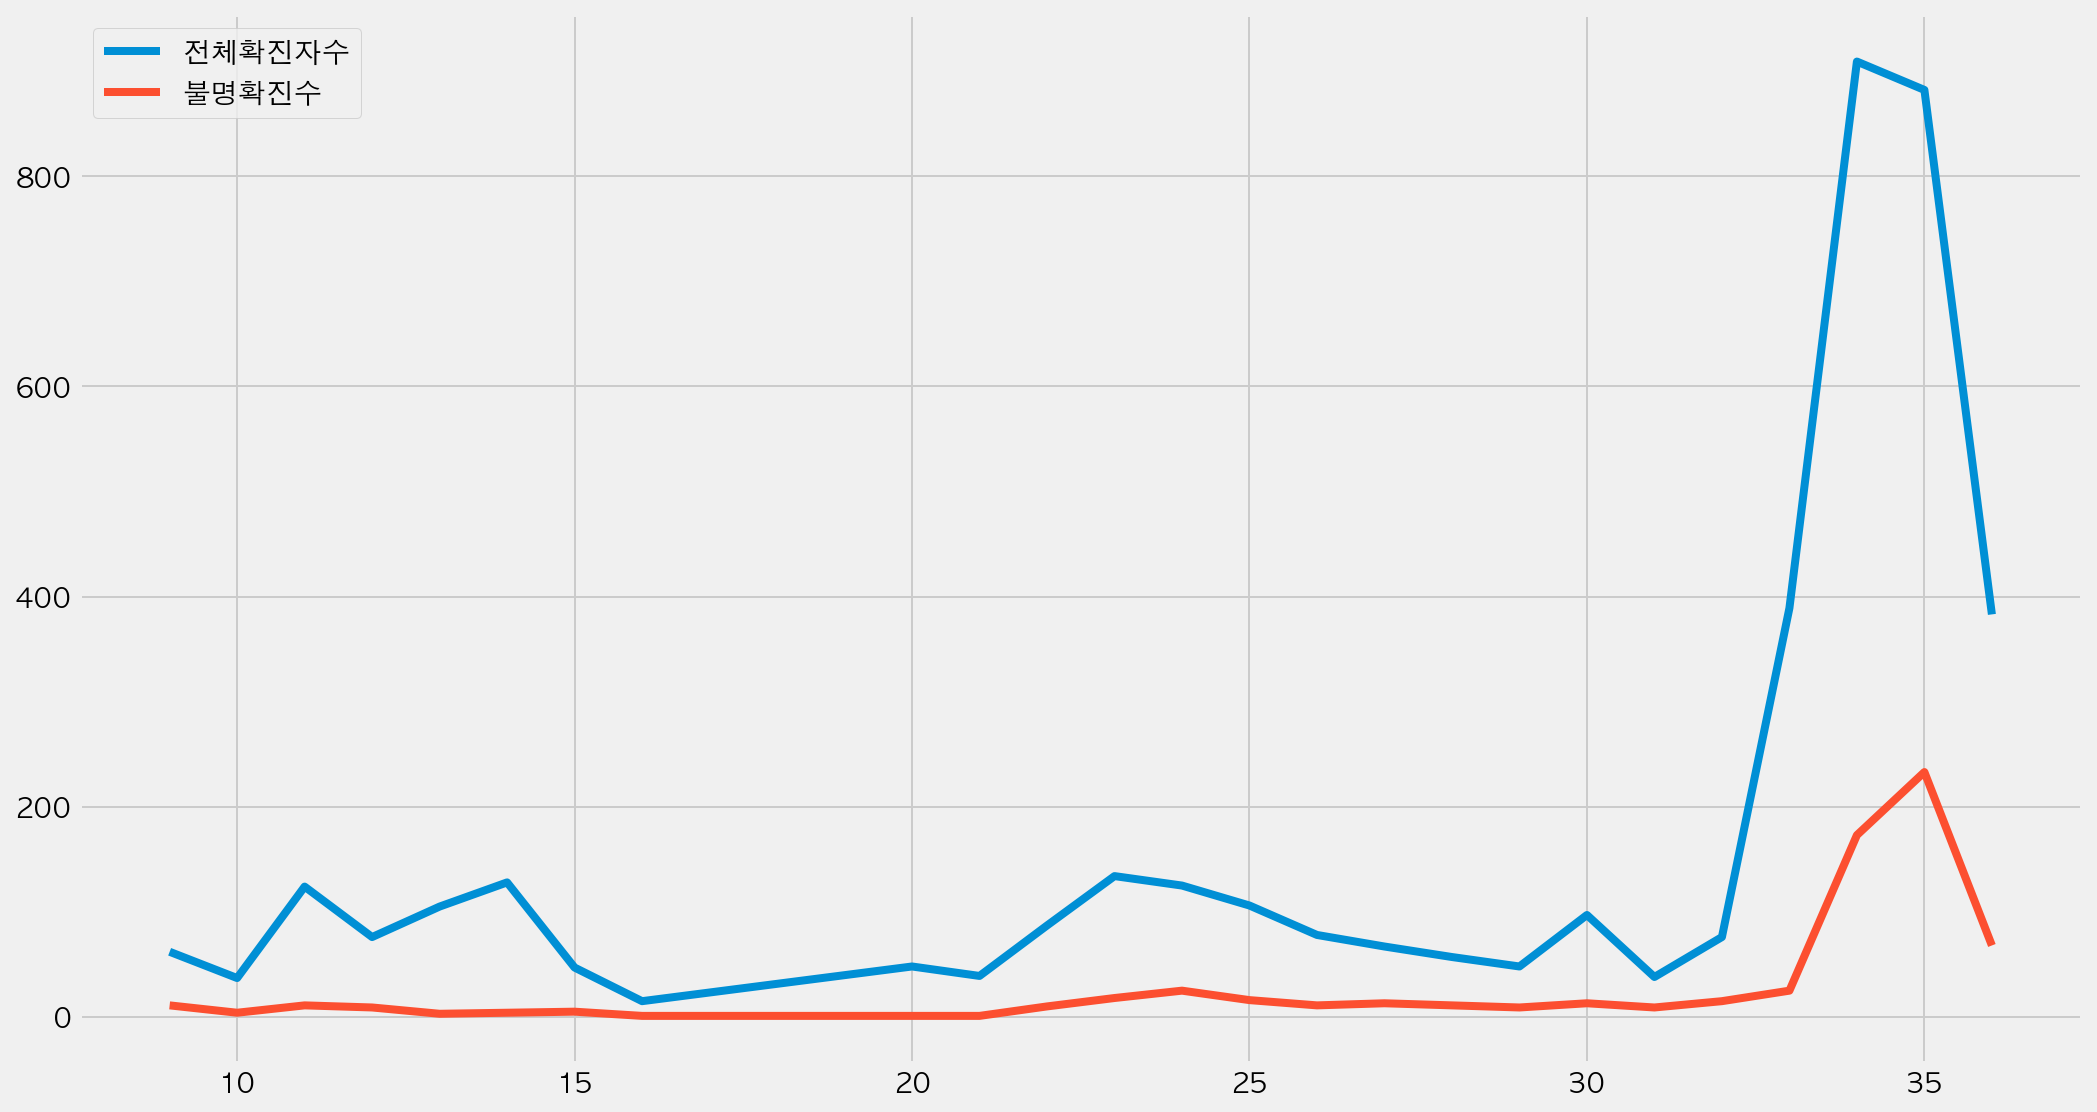

In [43]:
compare_graph = comparison.plot(figsize=(16,9))
compare_graph


In [44]:
fig_compare = compare_graph.get_figure()
fig_compare.savefig('./img/confirmed_vs_unconfirmed.png')

In [45]:
percentages = (comparison["불명확진수"] / comparison["전체확진자수"]) * 100
percentages

9     17.741935
10    10.810811
11     8.870968
12    11.842105
13     2.857143
14     3.125000
15    10.638298
16     6.666667
20     2.083333
21     2.564103
22    11.494253
23    13.432836
24    20.000000
25    15.094340
26    14.102564
27    19.402985
28    19.298246
29    18.750000
30    13.402062
31    23.684211
32    19.736842
33     6.426735
34    19.031903
35    26.417234
36    17.754569
dtype: float64

In [46]:
percentages[-4:]

33     6.426735
34    19.031903
35    26.417234
36    17.754569
dtype: float64

20.0
19.402985074626866
19.298245614035086
18.75
23.684210526315788
19.736842105263158
19.03190319031903
26.417233560090704


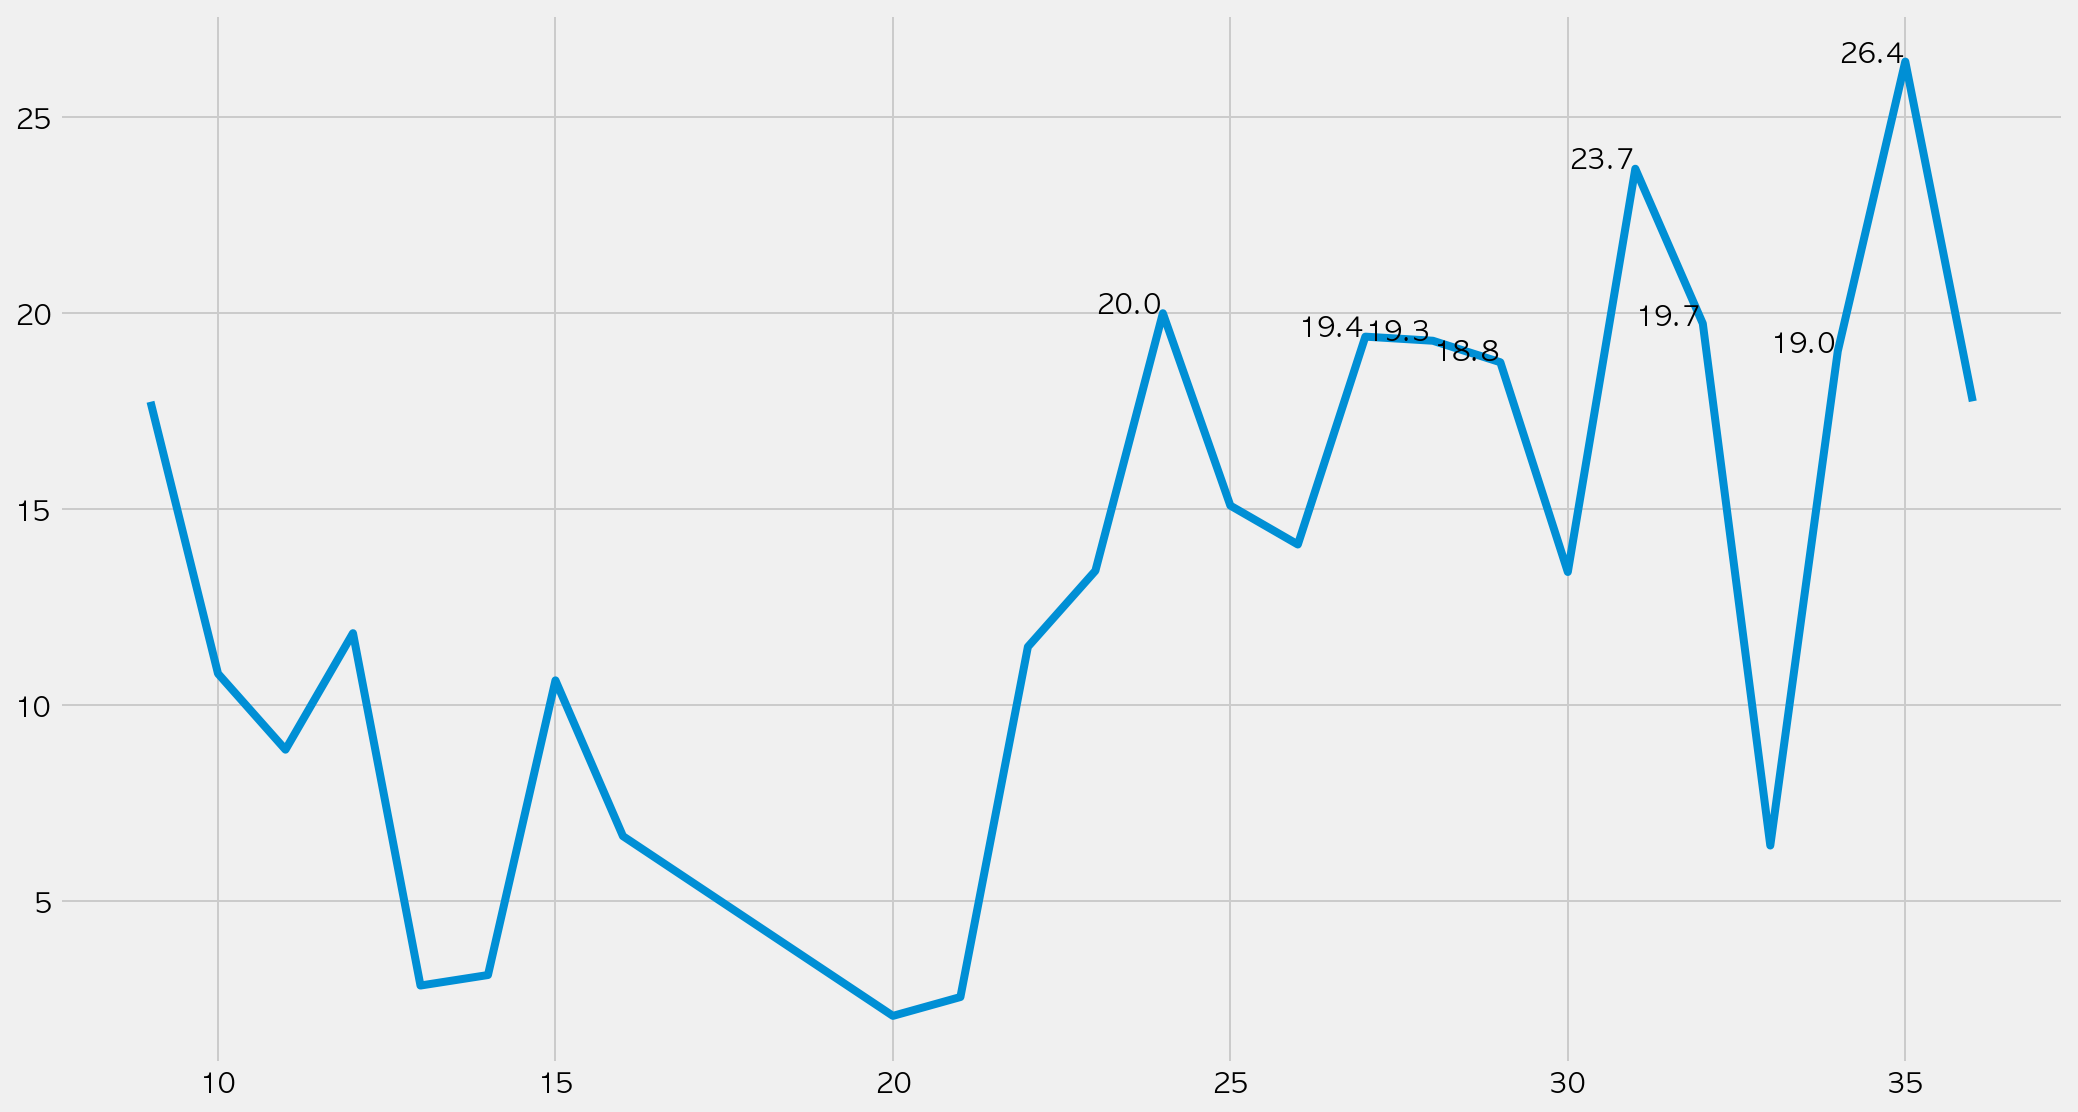

In [47]:
percentage_graph = percentages.plot(figsize=(16,9))

for i in range(len(percentages)):
    percent = percentages.iloc[i]
    percent = round(percent, 1)
    if percent > 18:
        print(percentages.iloc[i])
        percentage_graph.text(x=i+11, y=percent, s=percent)

In [48]:
fig = percentage_graph.get_figure()
fig.savefig('./img/unconfirmed_cases.png')

In [49]:
import os
from os import fdopen, remove, walk
import glob
from tempfile import mkstemp
import shutil
from shutil import move, copymode


In [50]:
DATASET_PATH = "/Users/noopy/covid19_unknown_spread/dataset"
datasets = glob.glob(f"{DATASET_PATH}/*.csv")
datasets

['/Users/noopy/covid19_unknown_spread/dataset/seoul_covid_8_31_.csv',
 '/Users/noopy/covid19_unknown_spread/dataset/seoul_covid_8_30_.csv',
 '/Users/noopy/covid19_unknown_spread/dataset/seoul_covid_8_17_.csv',
 '/Users/noopy/covid19_unknown_spread/dataset/seoul_covid_8_21_.csv',
 '/Users/noopy/covid19_unknown_spread/dataset/seoul_covid_7_04_.csv',
 '/Users/noopy/covid19_unknown_spread/dataset/seoul_covid_8_20_.csv',
 '/Users/noopy/covid19_unknown_spread/dataset/seoul_covid_8_16_.csv',
 '/Users/noopy/covid19_unknown_spread/dataset/seoul_covid_7_09_.csv',
 '/Users/noopy/covid19_unknown_spread/dataset/seoul_covid_9_01_.csv',
 '/Users/noopy/covid19_unknown_spread/dataset/seoul_covid_8_15_.csv',
 '/Users/noopy/covid19_unknown_spread/dataset/seoul_covid_9_02_.csv',
 '/Users/noopy/covid19_unknown_spread/dataset/seoul_covid_8_19_.csv',
 '/Users/noopy/covid19_unknown_spread/dataset/seoul_covid_8_23_.csv',
 '/Users/noopy/covid19_unknown_spread/dataset/seoul_covid_8_22_.csv',
 '/Users/noopy/covid

In [51]:
no_paths = []

for data_file in datasets:
    df_temp = pd.read_csv(data_file, encoding="utf-8")
    no_infection_paths = len(df_temp["접촉력"].unique()) # get unique value for types of contagion route 
    no_paths.append(no_infection_paths)

In [52]:
no_paths.sort()
print(no_paths)

[133, 135, 170, 171, 173, 174, 175, 176, 180, 182, 184, 185, 193, 204, 209, 211, 215, 222, 226, 230, 231]


In [53]:
len(df[df["접촉력"].str.contains("기타 확진자")])/1.5

323.3333333333333